In [21]:
print("Hello Group 9")

Hello Group 9


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
df = pd.read_csv("Traffic.csv")
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [24]:
df.shape

(2976, 9)

In [25]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

Dữ liệu trong tháng từ ngày 10 của tháng này đến ngày 9 của tháng sau

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [27]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [28]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

Dữ liệu rất đẹp, các feature không có ô nào missing nên không cần phải làm sạch 

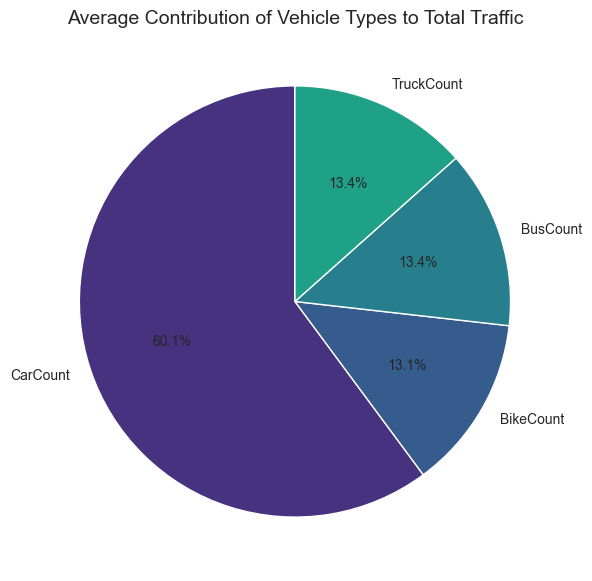

In [34]:
# Pie chart for average contribution of each vehicle type to total traffic
average_vehicle_counts = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()

Tỉ lệ người dân tha gia giao thông bằng ô tô khá nhiều và các hình thức khác khá cân bằng nhau

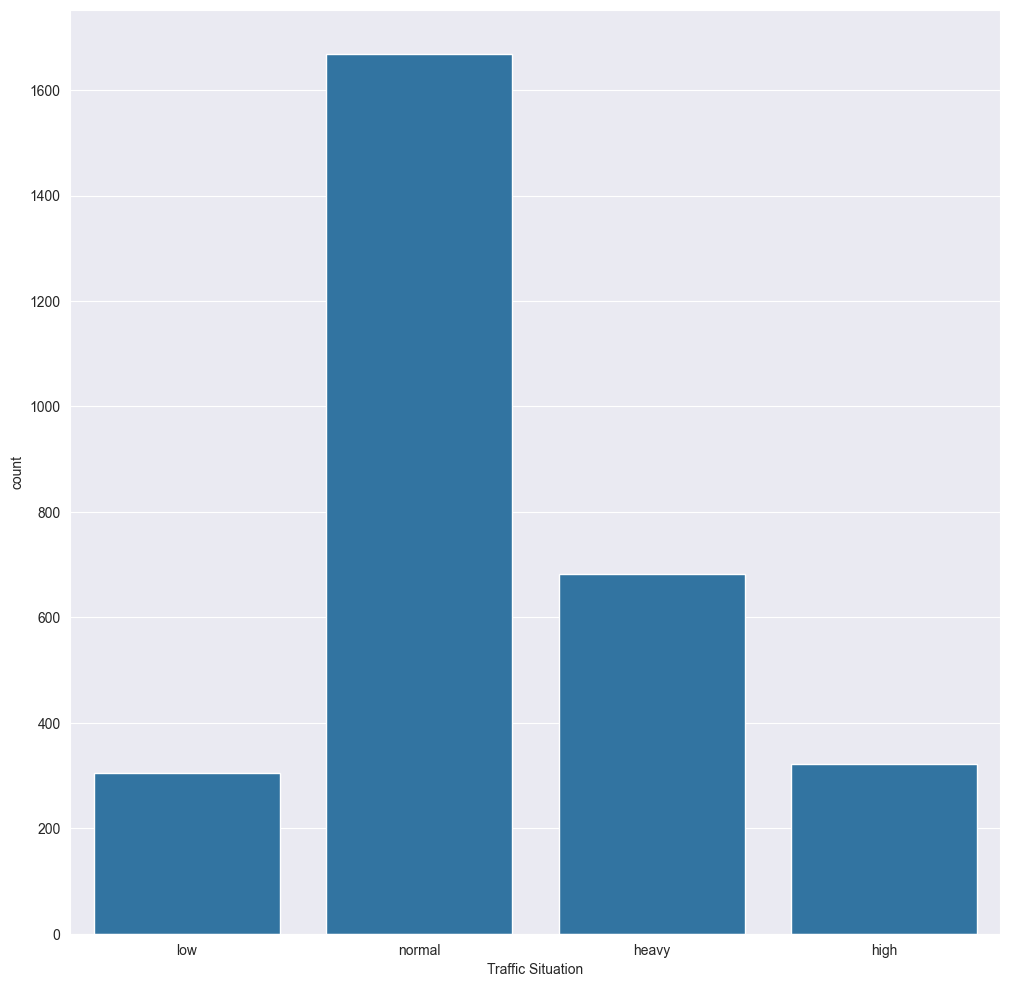

In [29]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

Tình trạng giao thông ở đấy khá ổn với mức bình thường khá cao

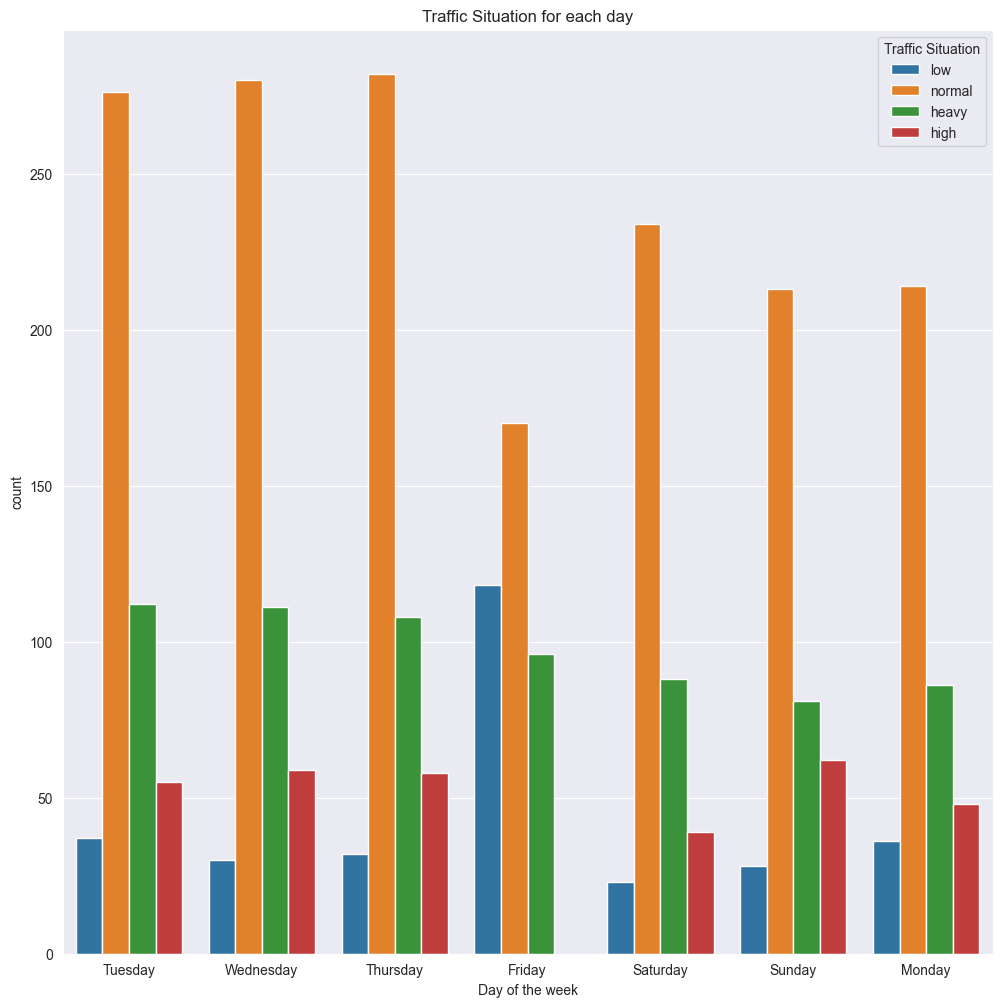

In [30]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

Tình trạng giao thông trung bình theo ngày trong tháng

In [31]:
meansOT = ["CarCount", "BikeCount", "BusCount", "TruckCount"]
custom_dict = {"Monday": 0, "Tuesday": 1, "Wednesday":2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
df_copy = df.copy()
times = []


for time in df_copy["Time"]:
    d = time.split()
    part = d[0].split(":")
    
    if d[1] == "PM":
        if part[0] != "12":
            part[0] = str(int(part[0]) + 12)
            times.append(":".join(part))
            continue
    
    if d[1] == "AM" and part[0] == "12" and d[0] != "12:00:00":
            part[0] = str("00")
            times.append(":".join(part))
            continue
    
    times.append(d[0])

df_copy["Time"] = times
    
# Sort time
import time
format = '%H:%M:%S'
time_hours = [time.strptime(t, format) for t in df_copy["Time"]]

df_copy["TimeConvert"] = time_hours
df_copy.sort_values(["Day of the week", "TimeConvert"])
grouped_df2 = df_copy.groupby(["Day of the week", "TimeConvert", "Time"]).sum()[meansOT + ["Total"]].sort_values(["Day of the week", "TimeConvert"], key=lambda x: x.map(custom_dict))

In [32]:
grouped_df2.reset_index(inplace=True)
grouped_df2

hours = []
# New columns to agg
for time in grouped_df2["Time"]:
    hours.append(int(time.split(":")[0]))
    
grouped_df2["Hour"] = hours

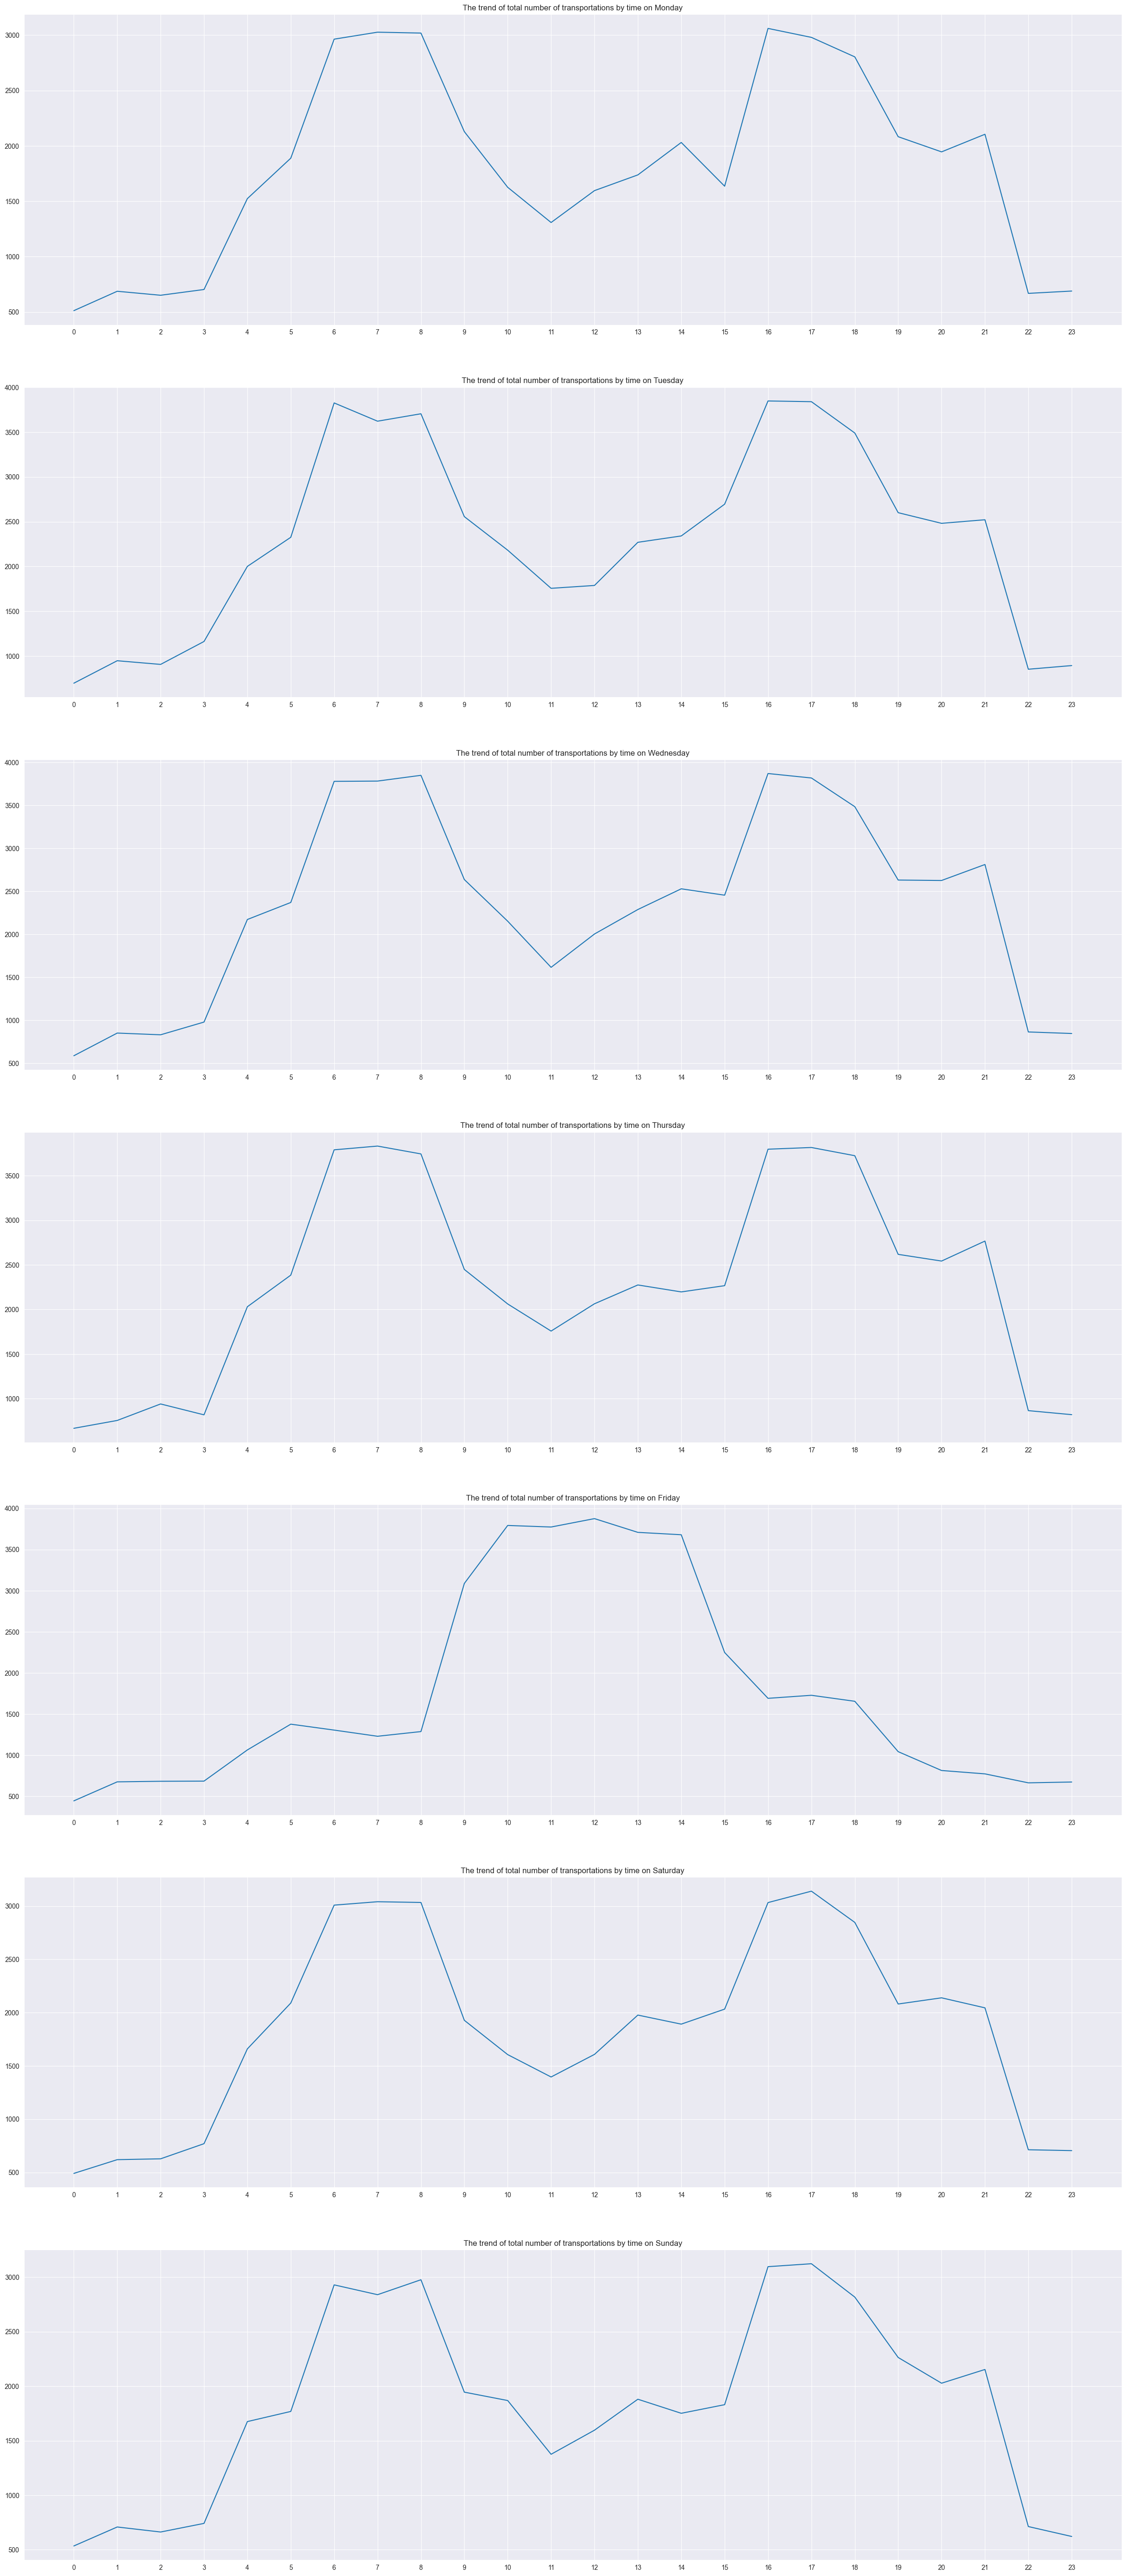

In [33]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(7,1, figsize =(30, 70))
i = 0

for day in grouped_df2["Day of the week"].unique():
    data = grouped_df2.loc[grouped_df2["Day of the week"] == day].groupby("Hour", as_index=False).agg('sum')
     
    axs[i].plot(data["Hour"], data["Total"])
    axs[i].set_xticks(np.arange(0, 24, 1))
    
    axs[i].set_title(f"The trend of total number of transportations by time on {day}")
    i += 1

plt.show()

Tình trạng giao thông trở nên đông đúc từ lúc 6h - 8 h sáng và từ 4h - 6h chiều đây có vẽ như là giờ cao điểm giờ người dân đi làm và đi về